# PRACTICE 1.
### Solution by: Santiago Sarabia Sainz.
## EXERCISE 1.
#### Initial Sample
| 65 | 48 | 77 | 90 | 75 | 53 | 58 | 59 | 65 | 59 | 70 | 47 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |


In [128]:
import pandas as pd
import sympy as sp
import numpy as np

# Initial Sample
df = pd.DataFrame({'Values':[65, 48, 77, 90, 75, 53, 58, 59, 65, 59, 70, 47]})

# Sample aranged from lowest to highest value
df_aranged = df.sort_values('Values')

print(df_aranged)

    Values
11      47
1       48
5       53
6       58
7       59
9       59
0       65
8       65
10      70
4       75
2       77
3       90


#### Organized Sample
| 47 | 48 | 53 | 58 | 59 | 59 | 65 | 65 | 70 | 75 | 77 | 90 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |

---
### A) RANGE
#### Formula

$$ Range = x_{max} - x_{min} $$


#### Written procedure
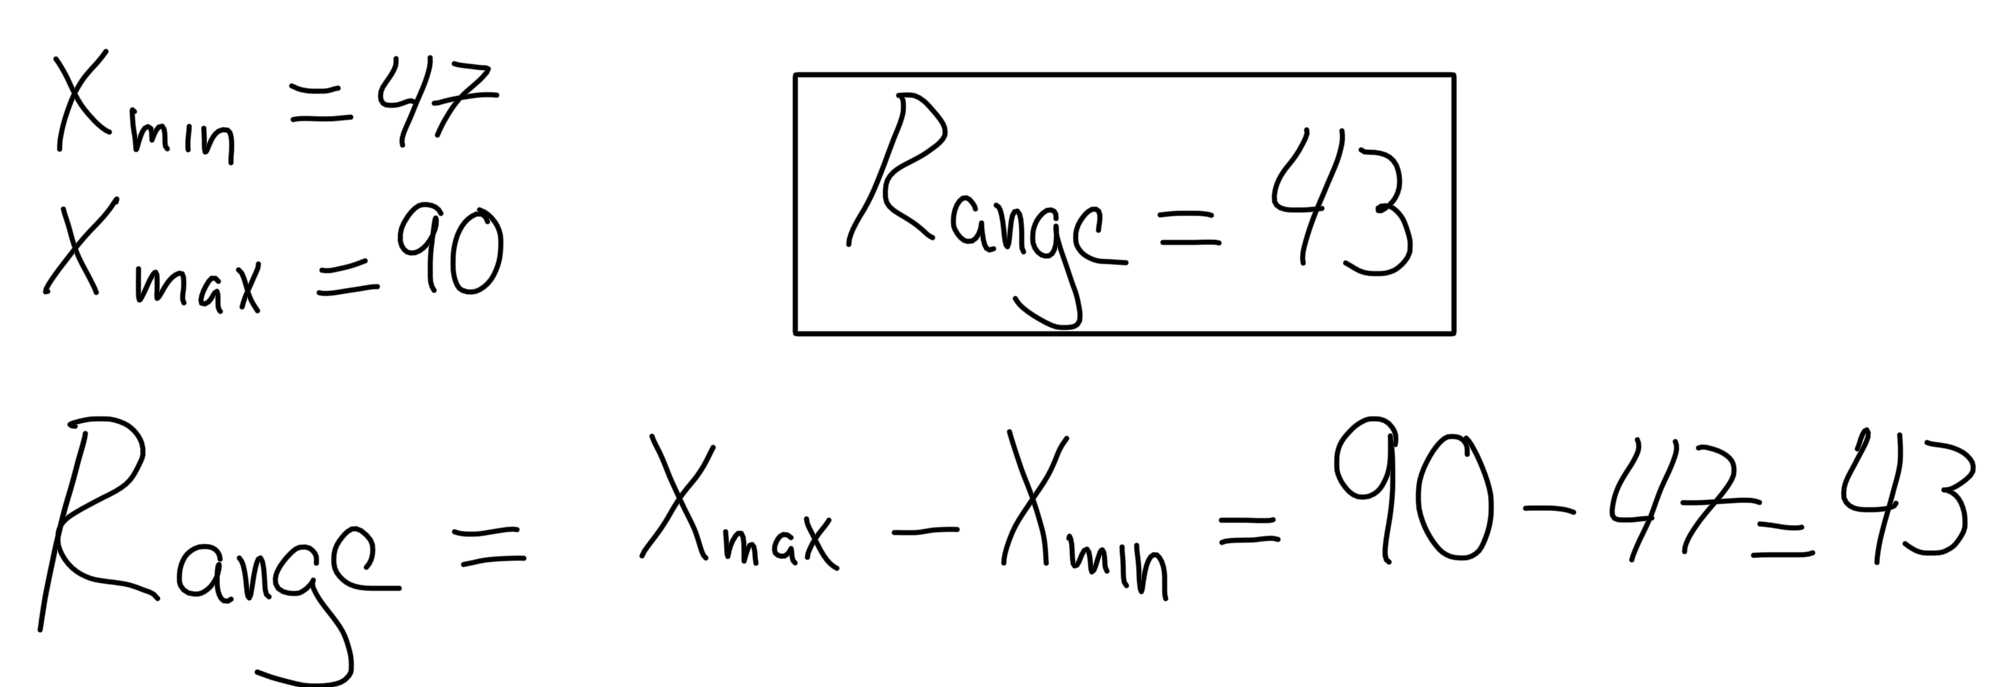

#### Python procedure


In [92]:
# Define the variables
max_val, min_val, range_val = sp.symbols('x_max x_min Range')

# Create the equation
eq = sp.Eq(range_val, max_val - min_val)

# Display the equation
sp.pprint(eq)

# Calculate range values
print("\nRange values: \n")

# Max value in our sample
range_max = df.max()[0]
eq_max = sp.Eq(max_val, range_max)
sp.pprint(eq_max)

# Min value in our sample
range_min = df.min()[0]
eq_min = sp.Eq(min_val, range_min)
sp.pprint(eq_min)

# Range in our sample
eq_result = sp.Eq(range_val, range_max - range_min)
print('\n')
sp.pprint(eq_result)

Range = xₘₐₓ - xₘᵢₙ

Range values: 

xₘₐₓ = 90
xₘᵢₙ = 47


Range = 43


---
### B) ARITHMETIC MEAN
#### Formula

$$ \bar{X} = \frac{\sum{(x)}}{n}$$

#### Written procedure
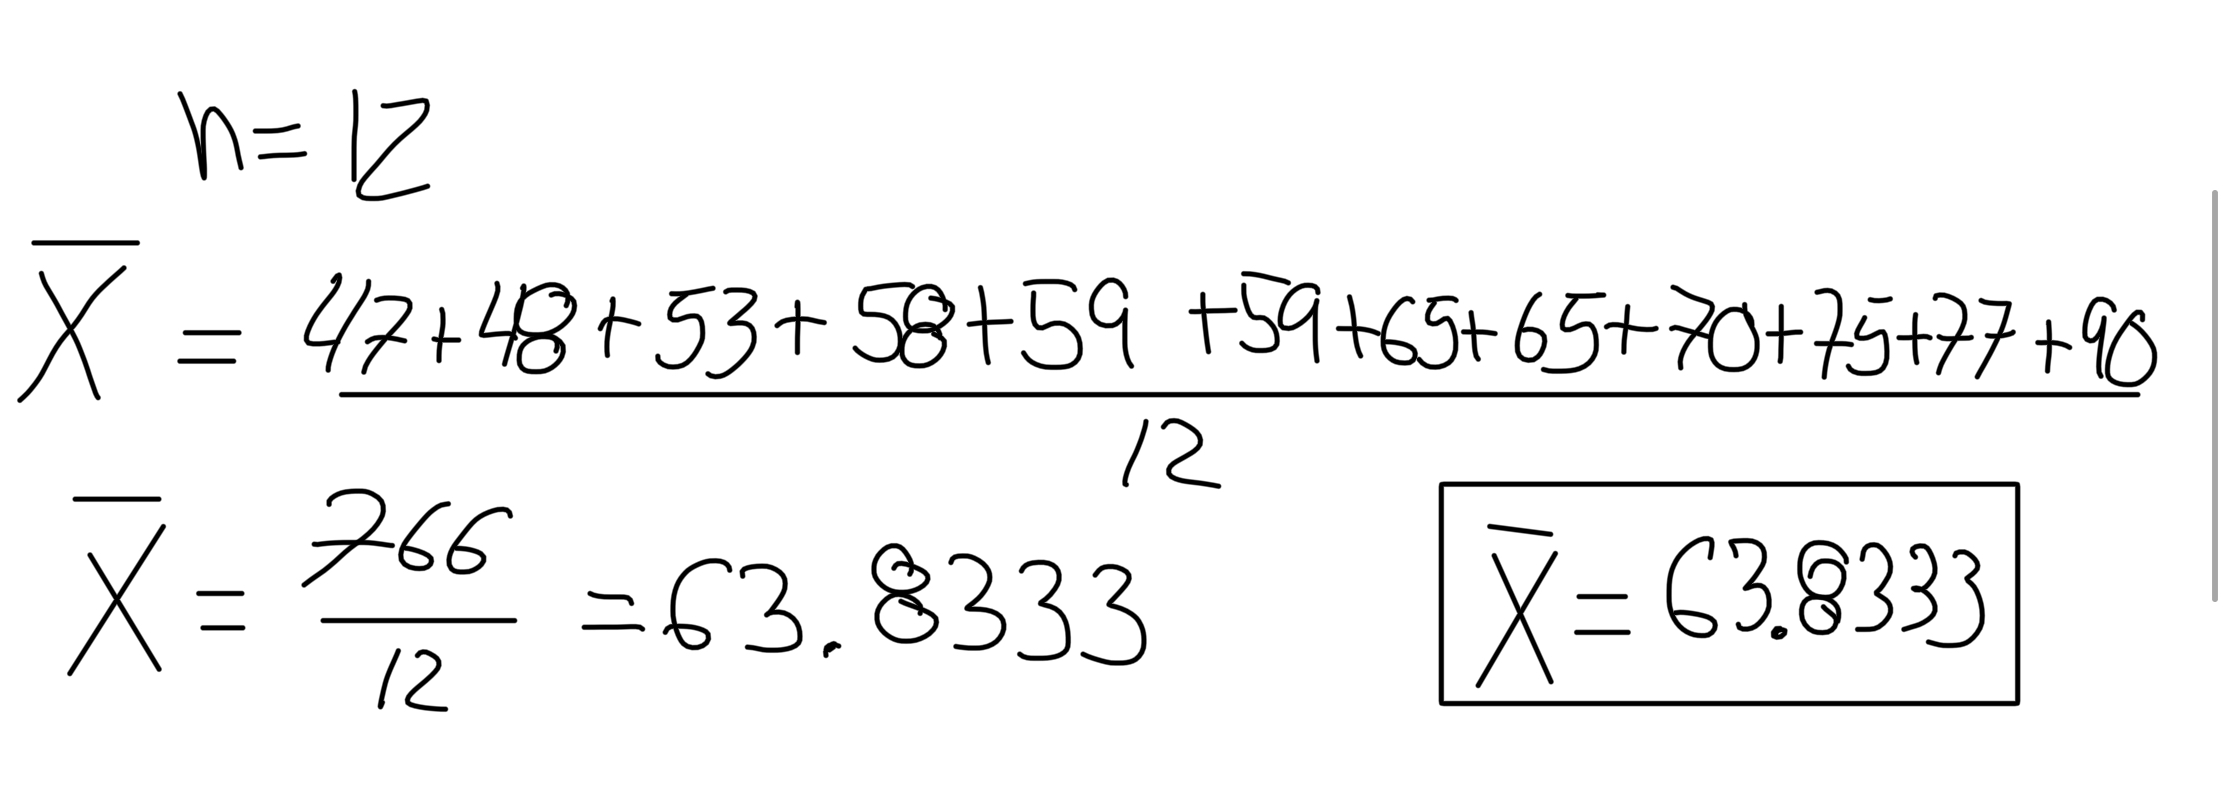

#### Python procedure


In [95]:
mean, n, X = sp.symbols('Xbar n, X')
sig = sp.Function('∑')
mean_eq = sp.Eq(mean, sig(X) / n)
sp.pprint(mean_eq)

# n value
df_n = len(df['Values'])
eq_n = sp.Eq(n, df_n)
sp.pprint(eq_n)

# X summation
df_sum = df.sum()[0]
eq_sum = sp.Eq(sig(X), df_sum)
sp.pprint(eq_sum)


# Mean in our sample
eq_mean = sp.Eq(mean, df_sum / df_n)
print('\n')
sp.pprint(eq_mean)
print(f'\nusing pandas integrated mean method: {df.mean()[0]}')

    ∑(X)
X̅ = ────
     n  
n = 12
∑(X) = 766


X̅ = 63.8333333333333

using pandas integrated mean method: 63.833333333333336


---
### C) MEDIAN
To calculate the median, we must first order our sample

#### Organized Sample
| 47 | 48 | 53 | 58 | 59 | 59 | 65 | 65 | 70 | 75 | 77 | 90 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
#### Formula
When the sample n is odd:

$$ Median = (\frac{n+1}{2})^{th}  term $$

When the sample is even

$$ Median = (\frac{(\frac{n}{2})^{th}  term + (\frac{n}{2}+1)^{th}  term}{2}) $$

#### Written procedure
As our sample is even, we take the 2 middle values, 59 and 65
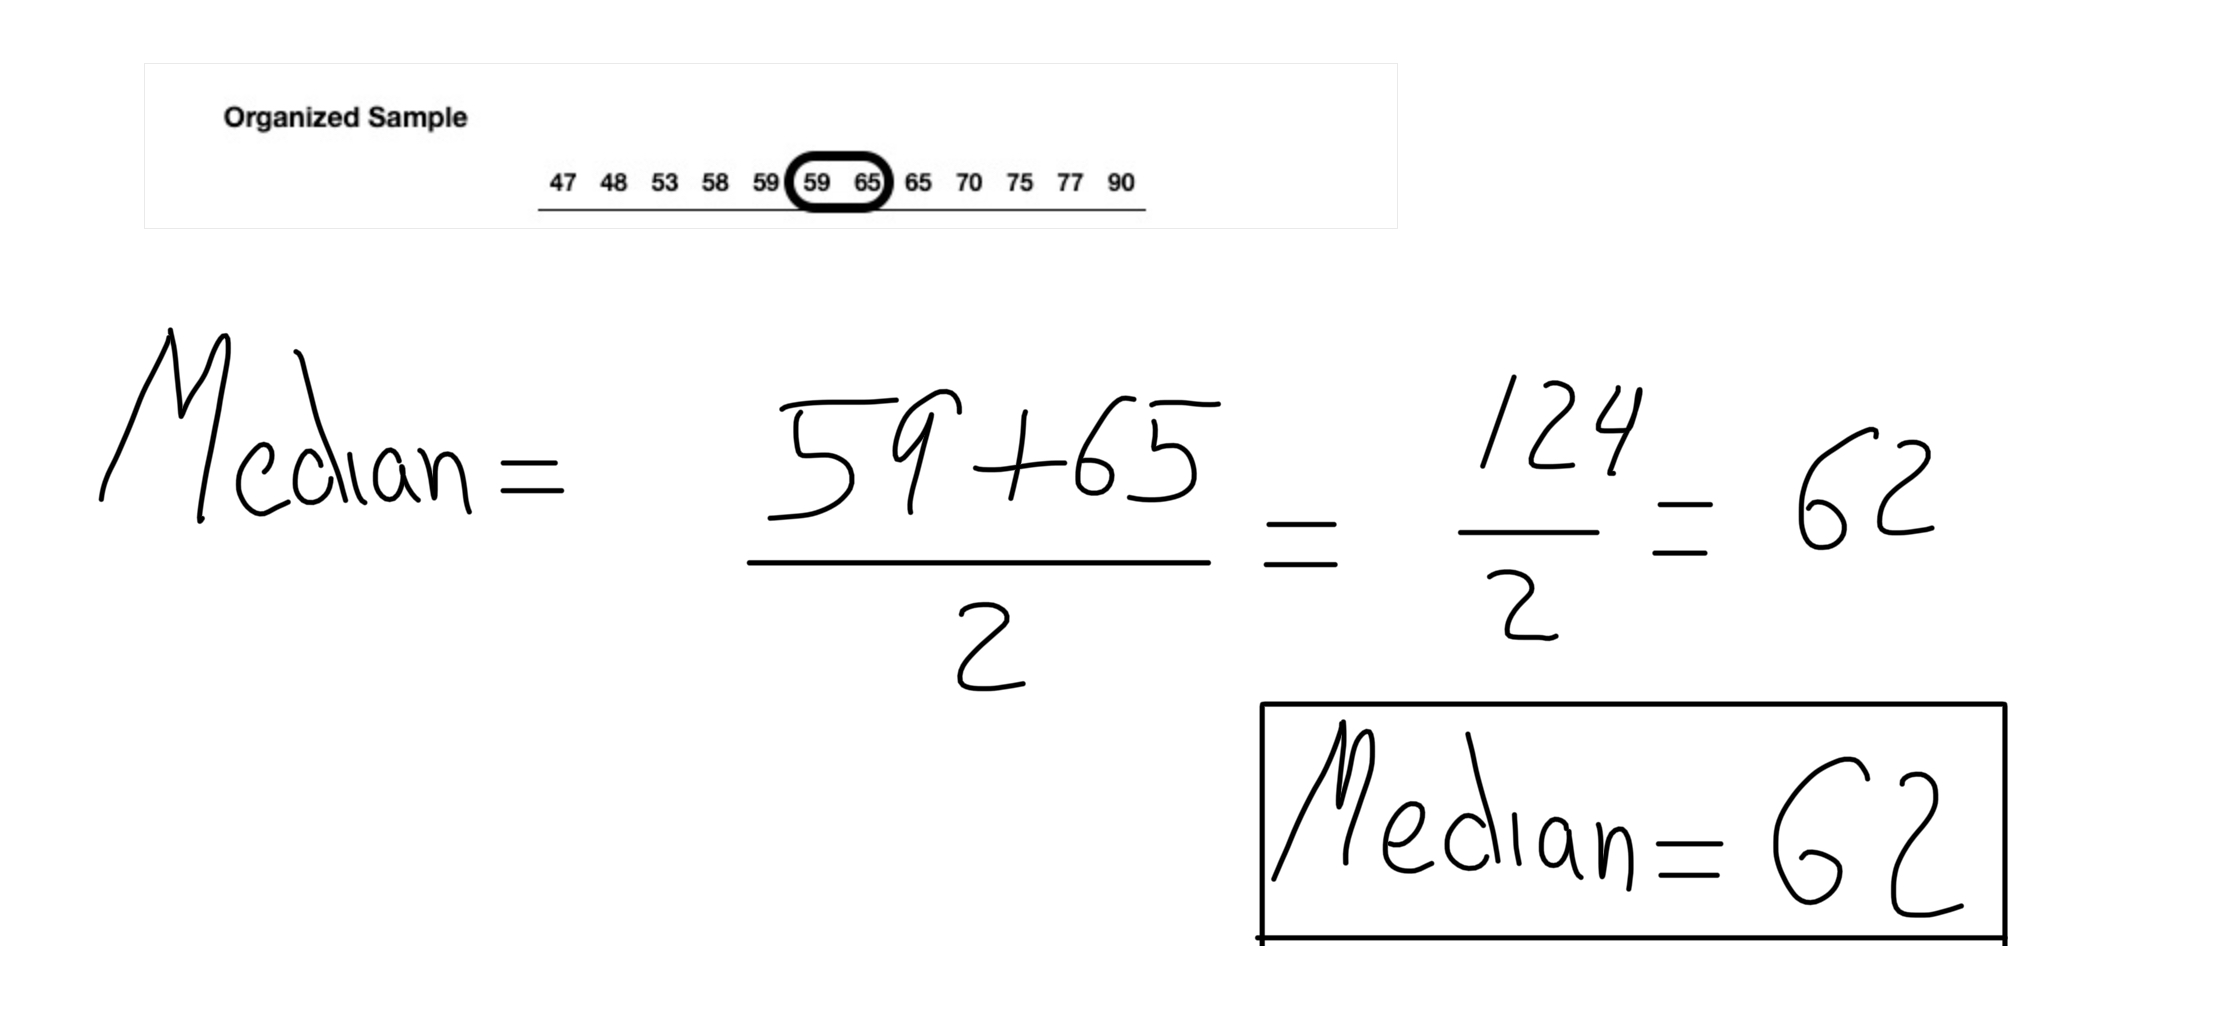

#### Python procedure

In [96]:
x_1, x_2, median  = sp.symbols('X_1 X_2, Median')
n_val = len(df_aranged['Values'])

if n_val % 2 == 0:
    # As python arrays start from index 0 and we calculate the floor of the equation
    # we must add + 1 to the first value
    # and + 2 to the second value
    # to get the values at the middle of the sample
    x_1_val = df_aranged['Values'][(n_val // 2)+1]
    x_2_val = df_aranged['Values'][(n_val // 2) + 2]
    x_1_eq = sp.Eq(x_1, x_1_val)
    x_2_eq = sp.Eq(x_2, x_2_val)
    sp.pprint(x_1_eq)
    sp.pprint(x_2_eq)
    
    median_val = sp.Eq(median, (x_1_val + x_2_val)/2)
    
else:
    # As python arrays start from index 0 and we calculate the floor of the equation
    # we must add + 2 to the value
    # to get the value at the middle of the sample
    x_1_val = df_aranged['Values'][(n_val // 2)+2]
    median_val = sp.Eq(median, x_1_val)
    
sp.pprint(median_val)
print(f'using pandas integrated median method: {df.median()[0]}')

X₁ = 59
X₂ = 65
Median = 62.0
using pandas integrated median method: 62.0


---
### D) MODE

#### Written procedure
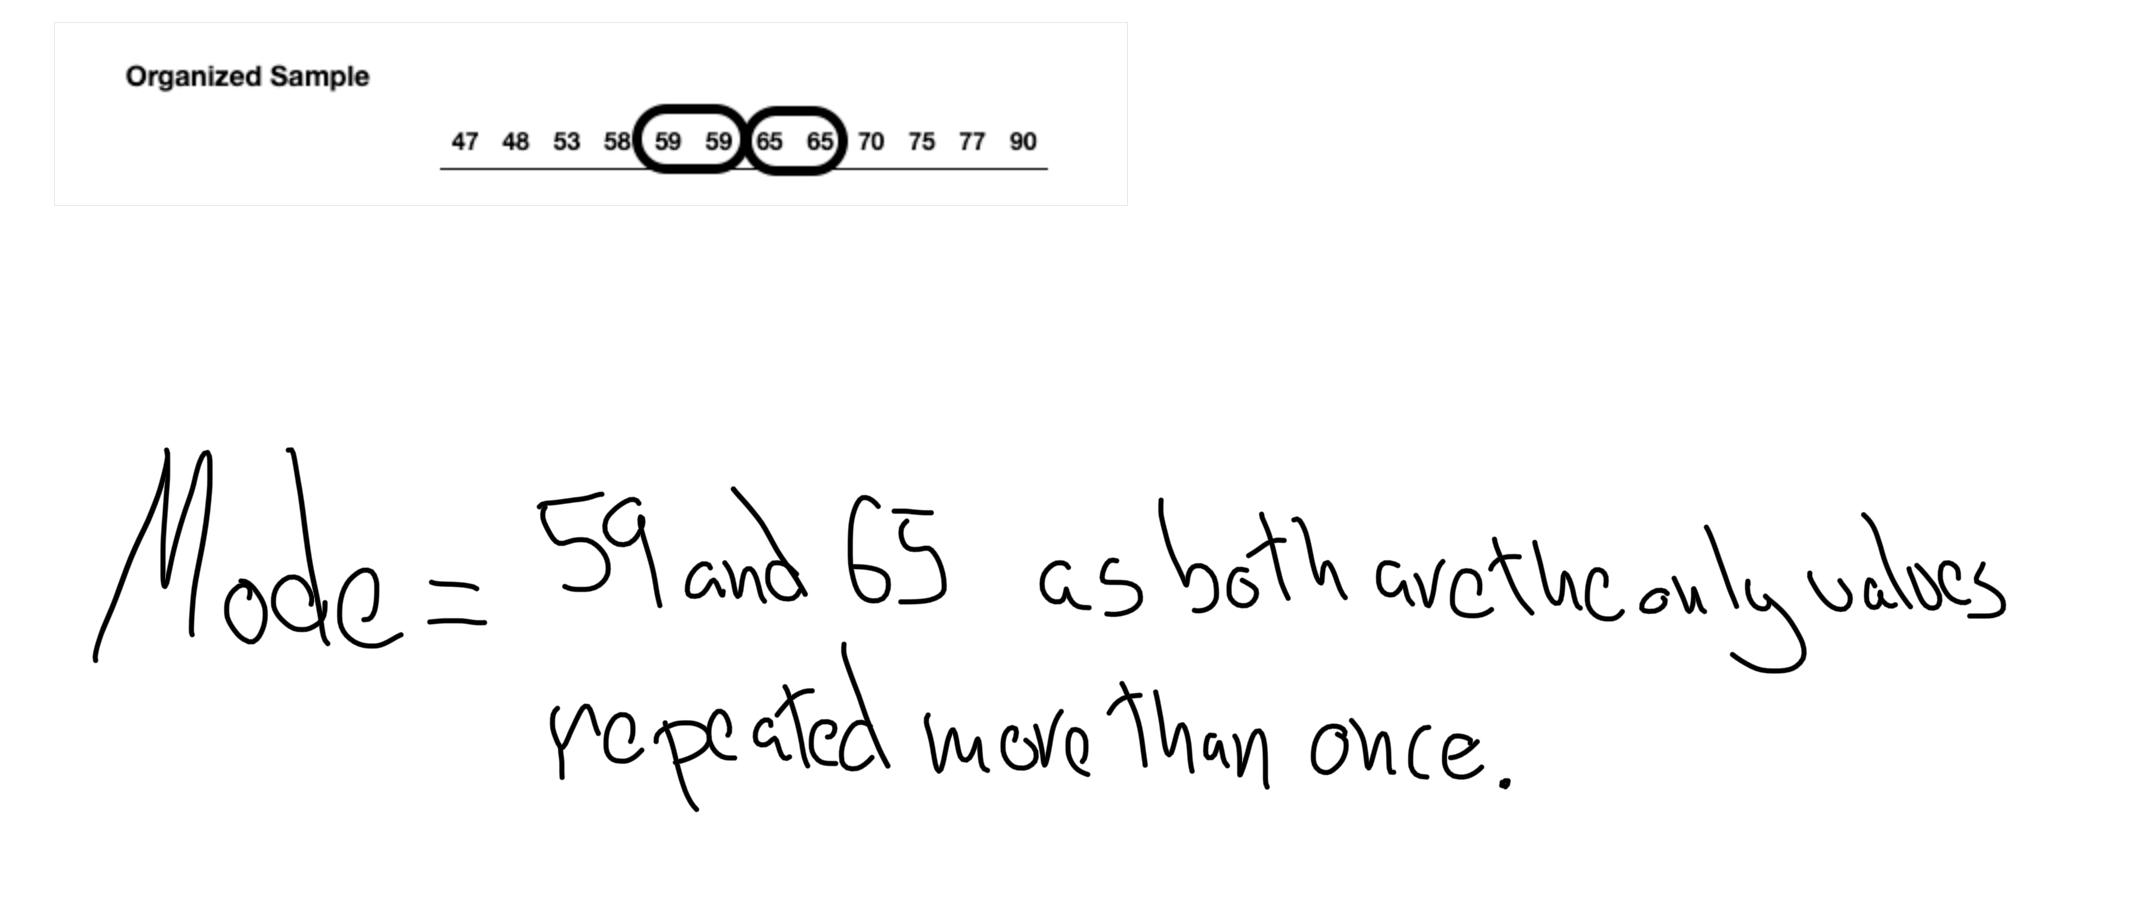

#### Python procedure

In [99]:
# There are 2 ways in which we can get the mode of our sample using python and pandas
# 1: using value_counts() to get a list of all the values with their respective count
#    where we can see that both 65 and 59 appear twice and the rest of the values
#    only once.

print(f"df[Column].value_counts() \n\n{df['Values'].value_counts()}\n")

# 2: the more straight forward approach: using the mode() function
print(f"df[Column].mode() \n\n{df['Values'].mode()}")


df[Column].value_counts() 

65    2
59    2
48    1
77    1
90    1
75    1
53    1
58    1
70    1
47    1
Name: Values, dtype: int64

df[Column].mode() 

0    59
1    65
Name: Values, dtype: int64


---
### E) VARIANCE
#### Formula

$$ s^2 = \frac{\sum{(x_i - \bar{X})^2}}{n-1}$$

#### Written procedure
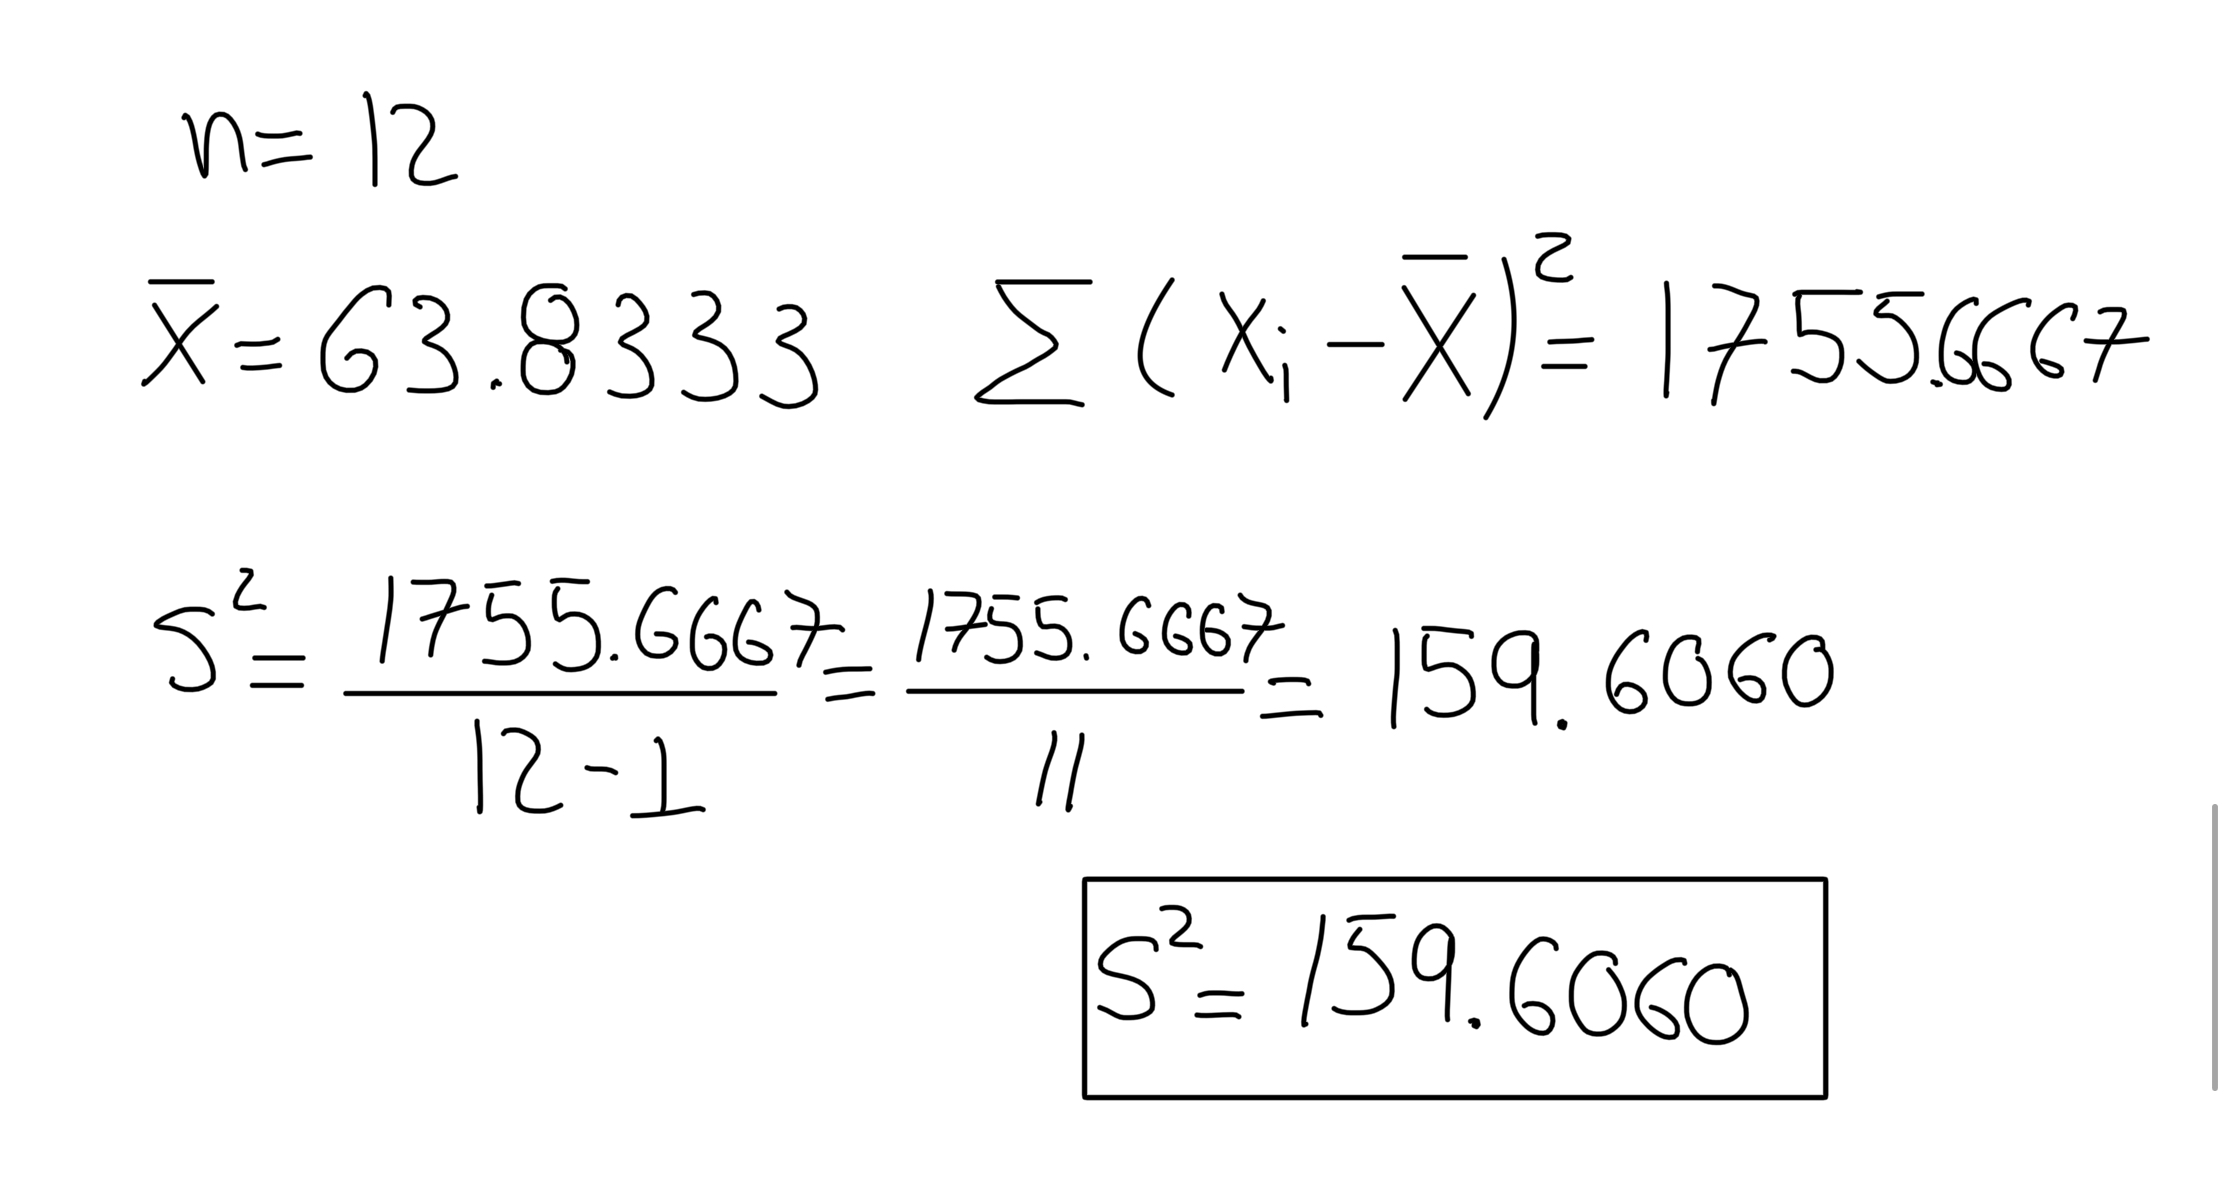
#### Python procedure

In [102]:
# define symbol for squared
st, xi = sp.symbols('s, X_i')

print(f"1: Calculate the mean:\n")
sp.pprint(mean_eq)
print('\n')
sp.pprint(eq_mean)

print(f"\n2: Calculate sigma xi - x squared:\n")
df['xi-x-squared'] = (df['Values'] - df.mean()[0])**2
print(f"\n{df['xi-x-squared']}")

print(f"\n3: Calculate the sum of all values:\n")
sigma_sum = df['xi-x-squared'].sum()
sigma_eq = sp.Eq(sig(xi-mean)**2, sigma_sum)
sp.pprint(sigma_eq)

# Divide between n -1
print(f"\n4: Divide between n - 1:\n")
sigma_div = sp.Eq(st**2, sigma_sum / (n -1))
sp.pprint(sigma_div)
sigma_sum / (n_val)

sigma_res = sp.Eq(st**2, sigma_sum / (n_val -1))
sp.pprint(sigma_res)

df = df.drop(columns=['xi-x-squared'])

print(f'\nusing pandas integrated var method: {df.var()[0]}')

1: Calculate the mean:

    ∑(X)
X̅ = ────
     n  


X̅ = 63.8333333333333

2: Calculate sigma xi - x squared:


0       1.361111
1     250.694444
2     173.361111
3     684.694444
4     124.694444
5     117.361111
6      34.027778
7      23.361111
8       1.361111
9      23.361111
10     38.027778
11    283.361111
Name: xi-x-squared, dtype: float64

3: Calculate the sum of all values:

 2                           
∑ (Xᵢ - X̅) = 1755.66666666667

4: Divide between n - 1:

 2   1755.66666666667
s  = ────────────────
          n - 1      
 2                   
s  = 159.606060606061

using pandas integrated var method: 159.60606060606062


### D) STANDARD DEVIATION
#### Formula
$$ s = \sqrt{\frac{\sum{(x_i - \bar{X})^2}}{n-1}} $$

#### Written procedure
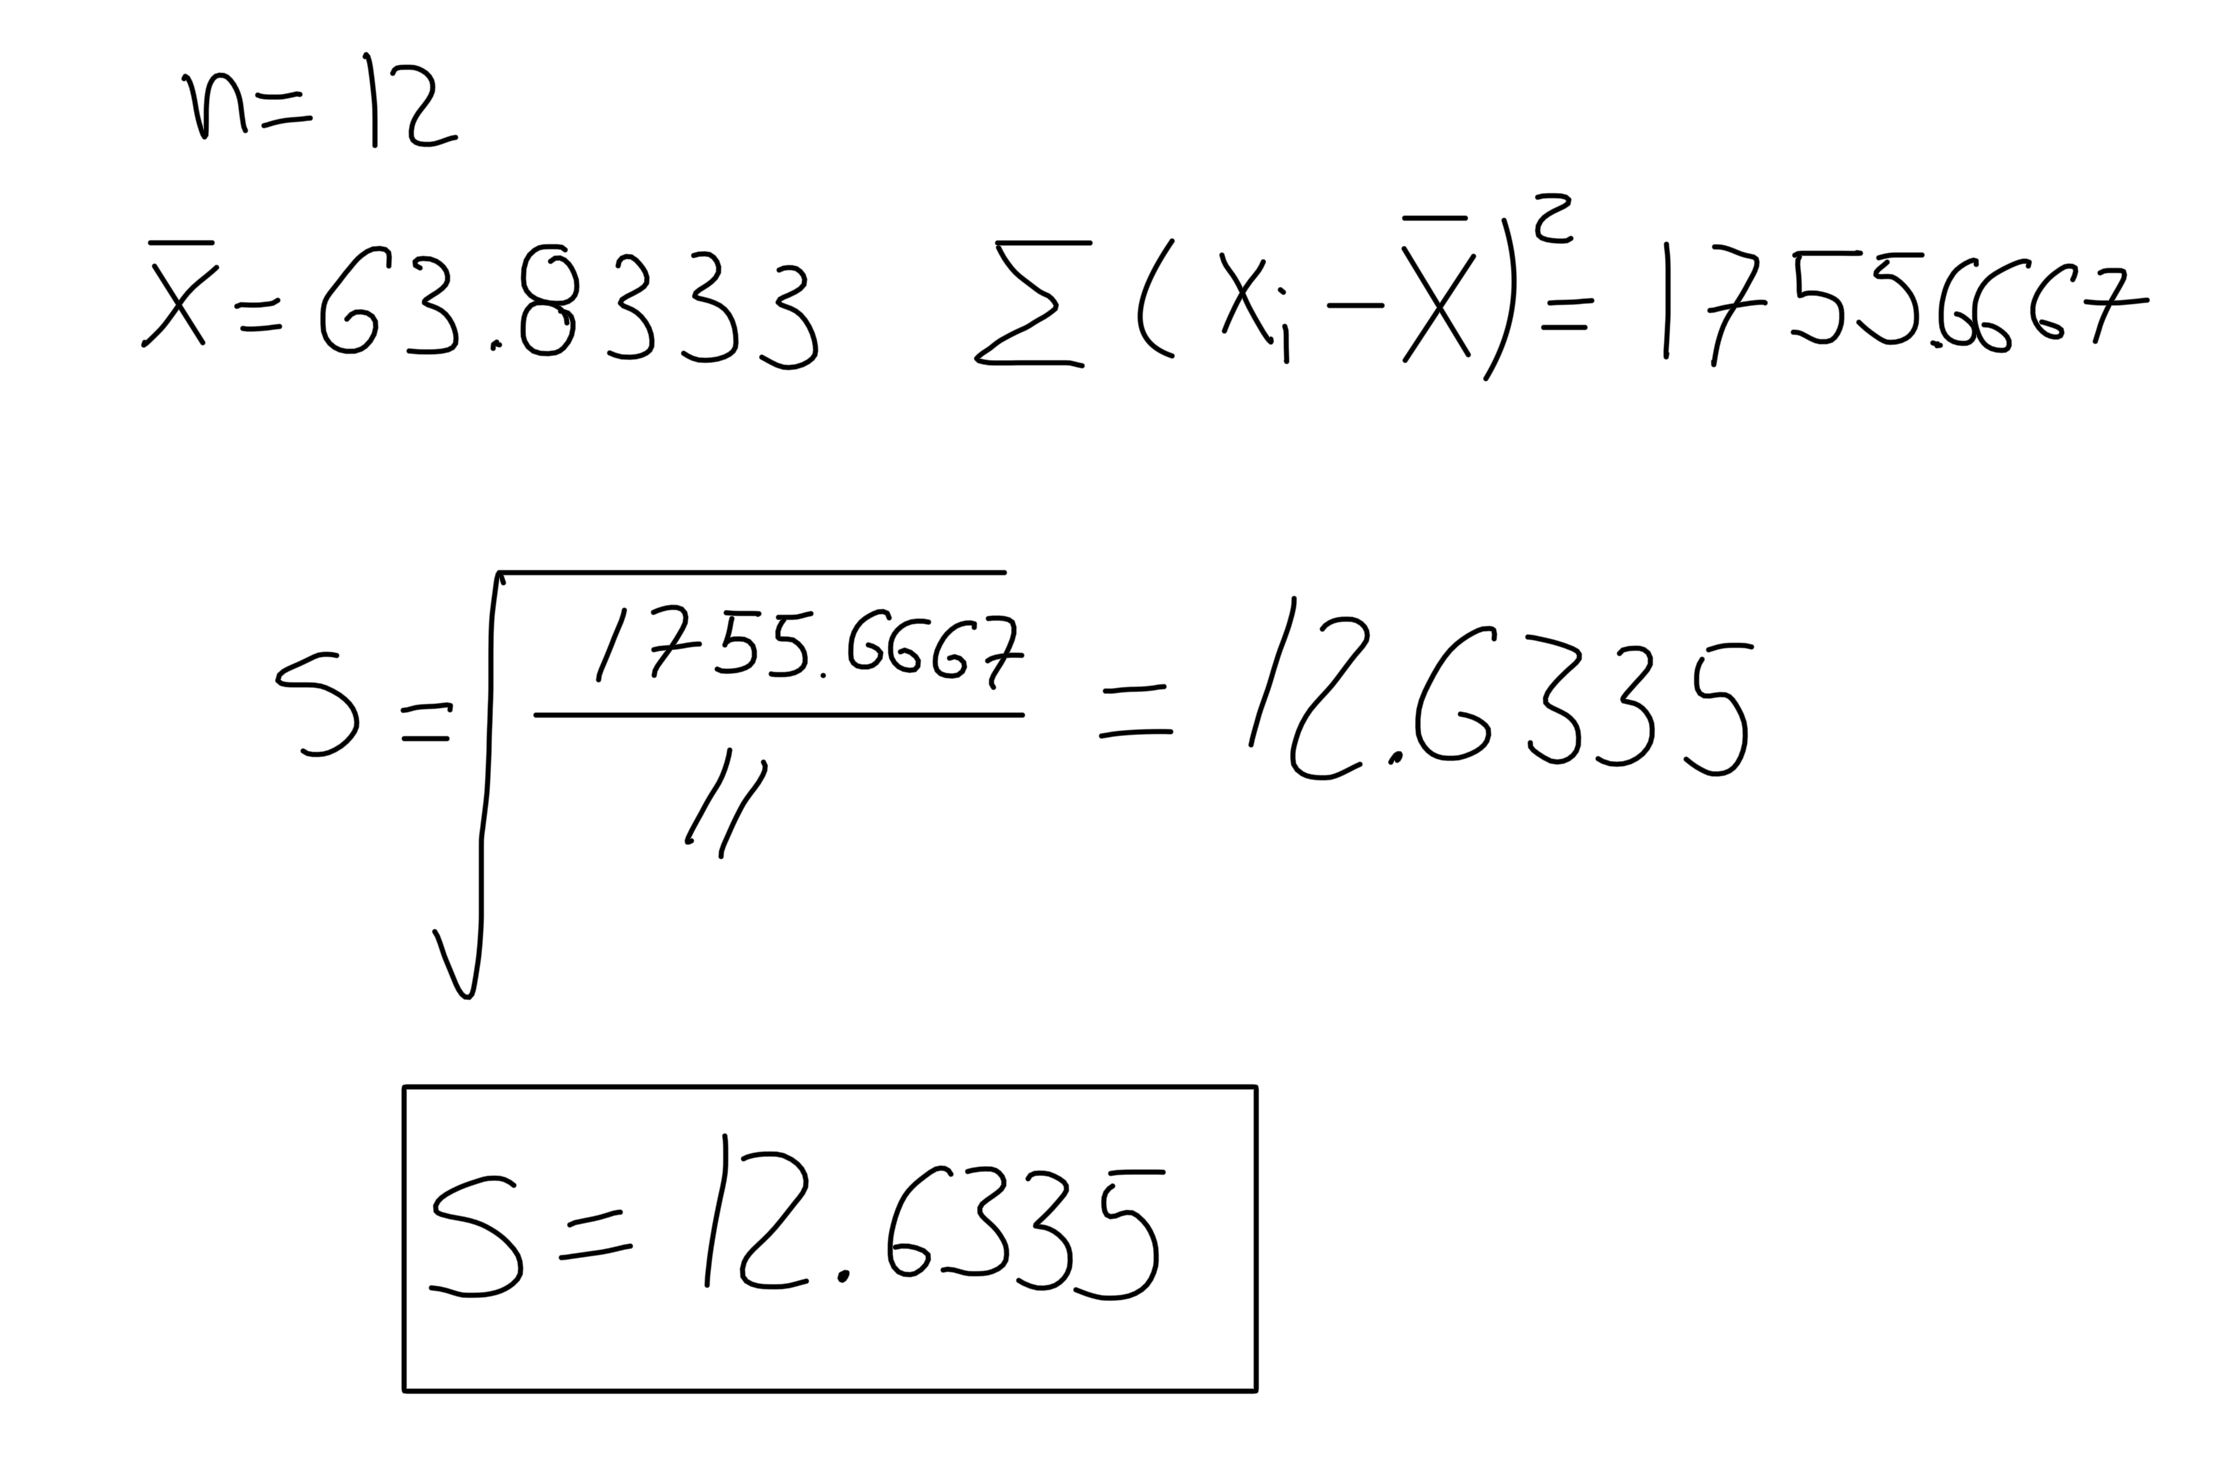
#### Python procedure

In [103]:
print(f"1: Calculate the mean:\n")
sp.pprint(mean_eq)
print('\n')
sp.pprint(eq_mean)

print(f"\n2: Calculate sigma xi - x squared:\n")
df['xi-x-squared'] = (df['Values'] - df.mean()[0])**2
print(f"\n{df['xi-x-squared']}")

print(f"\n3: Calculate the sum of all values:\n")
sigma_sum = df['xi-x-squared'].sum()
sigma_eq = sp.Eq(sig(xi-mean)**2, sigma_sum)
sp.pprint(sigma_eq)

# Divide between n -1
print(f"\n4: Divide between n - 1:\n")
sigma_div = sp.Eq(st, sigma_sum / (n -1))
sp.pprint(sigma_div)
sigma_sum / (n_val)

# Get the square root
print(f"Get the square root\n")
sigma_res = sp.Eq(st, sp.sqrt(sigma_sum / (n_val -1)))
sp.pprint(sigma_res)

df = df.drop(columns=['xi-x-squared'])

print(f'\nusing pandas integrated std method: {df.std()[0]}')

1: Calculate the mean:

    ∑(X)
X̅ = ────
     n  


X̅ = 63.8333333333333

2: Calculate sigma xi - x squared:


0       1.361111
1     250.694444
2     173.361111
3     684.694444
4     124.694444
5     117.361111
6      34.027778
7      23.361111
8       1.361111
9      23.361111
10     38.027778
11    283.361111
Name: xi-x-squared, dtype: float64

3: Calculate the sum of all values:

 2                           
∑ (Xᵢ - X̅) = 1755.66666666667

4: Divide between n - 1:

    1755.66666666667
s = ────────────────
         n - 1      
Get the square root

s = 12.6335292221161

using pandas integrated std method: 12.633529222116069


### D) THE 40TH PERCENTILE
#### Formula
$$ P = \frac{r}{n + 1} * 100 $$

#### Written procedure
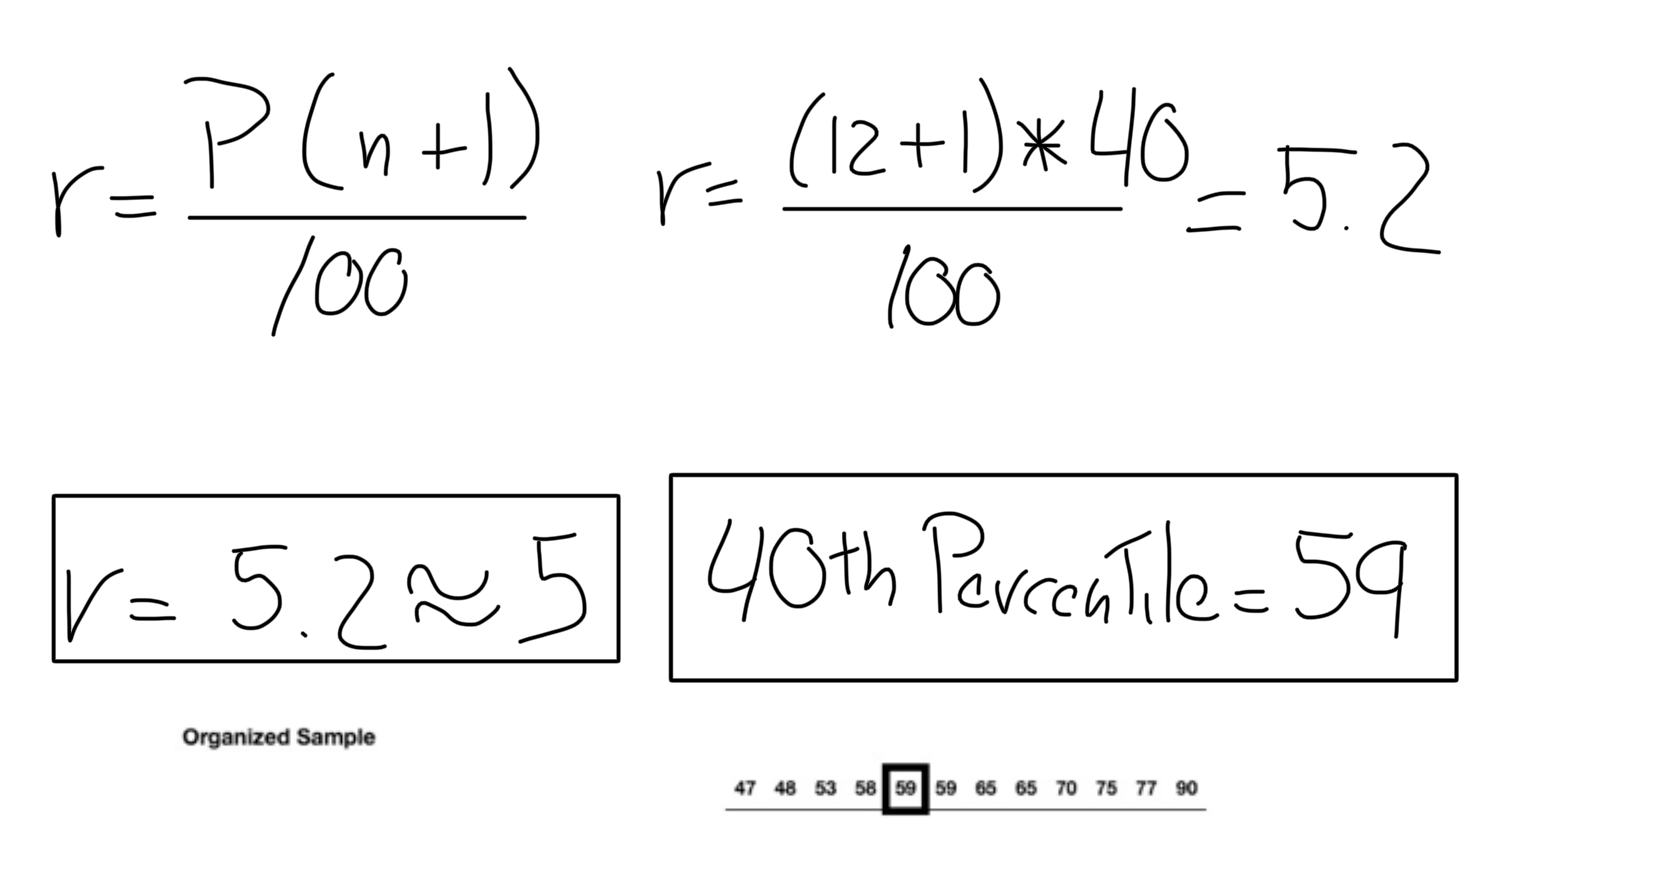
#### Python procedure

In [145]:
# define symbol for squared
r, p, n = sp.symbols('r P n')

perc_eq = sp.Eq(r, (p*(n+1))/100)
sp.pprint(perc_eq)
p_eq = sp.Eq(p, 40)
sp.pprint(p_eq)
n_eq = sp.Eq(n, 12)
sp.pprint(n_eq)
perc_eq = sp.Eq(r, (40*(12 + 1))/100)
sp.pprint(perc_eq)
perc_res_e1 = sp.Eq(p,59)
sp.pprint(perc_res_e1)

print('\n')

perc_res = sp

print(f'\nusing pandas integrated quantile method: {df.quantile(0.4)[0]}')

    P⋅(n + 1)
r = ─────────
       100   
P = 40
n = 12
r = 5.2
P = 59



using pandas integrated quantile method: 59.0


## EXERCISE 2.
#### Initial Sample
| First Partial | Second Partial | Final Exam |
| --- | --- | --- |
| 61 | 38 | 80 |
| 52 | 45 | 51 |
| 70 | 60 | 62 |
| 74 | 65 | 67 |
| 76 | 70 | 35 |
| 80 | 67 | 66 |
| 75 | 70 | 68 |
| 65 | 69 | 70 |
| 51 | 55 | 61 |
| 45 | 58 | 59 |


### A) GET THE MEAN OF THE 3 COLUMNS OF THE TABLE

In [146]:
# Using Numpy
grades = np.array([[61, 38, 80], [52, 45, 51], [70, 60, 62], [74, 65, 67], [76, 70, 35], [80, 67, 66], [75, 70, 68], [65, 69, 70], [51, 55, 61], [45, 58, 59]])

print(f"Numpy: \n\n {grades.mean(axis=0)}\n\nPandas: \n")

# Using Pandas
grades_df = pd.DataFrame(grades, columns=['First Partial', 'Second Partial', 'Final Exam'])
print(grades_df.mean(axis=0))


Numpy: 

 [64.9 59.7 61.9]

Pandas: 

First Partial     64.9
Second Partial    59.7
Final Exam        61.9
dtype: float64


### B) GET THE MEAN OF SCORES FOR EACH ROW IN THE DATA SET

In [147]:
print(f"Numpy: \n\n {grades.mean(axis=1)}\n\nPandas: \n\n{grades_df.mean(axis=1)}")

Numpy: 

 [59.66666667 49.33333333 64.         68.66666667 60.33333333 71.
 71.         68.         55.66666667 54.        ]

Pandas: 

0    59.666667
1    49.333333
2    64.000000
3    68.666667
4    60.333333
5    71.000000
6    71.000000
7    68.000000
8    55.666667
9    54.000000
dtype: float64


### C) GET THE STANDARD DEVIATION FOR EACH COLUMN

In [148]:
print(f"Numpy: \n\n {grades.std(axis=0)}\n\nPandas: \n\n{grades_df.std(axis=0)}")
# Neither of the results are incorrect, the difference is in the equation
# that is being used.

# pandas takes the unbiased estimator (n - 1)
# whereas numpy does not.

# To get the same result in both scenarios we can modify the numpy implementation and set:
# grades.std(axis=0, ddof=1)

# Or we can modify the pandas implementation to be:
# grades_df.std(axis=0, ddof=0)

Numpy: 

 [11.54512884 10.45035885 11.51043005]

Pandas: 

First Partial     12.169634
Second Partial    11.015645
Final Exam        12.133059
dtype: float64


### D) GET THE VARIANCE FOR EACH COLUMN

In [149]:
print(f"Numpy: \n\n {grades.var(axis=0)}\n\nPandas: \n\n{grades_df.var(axis=0)}")

# Same as before, if we want to match both results we just need to modify the ddof attribute.

print(f"Numpy: \n\n {grades.var(axis=0, ddof=1)}\n\nPandas: \n\n{grades_df.var(axis=0)}")

Numpy: 

 [133.29 109.21 132.49]

Pandas: 

First Partial     148.100000
Second Partial    121.344444
Final Exam        147.211111
dtype: float64
Numpy: 

 [148.1        121.34444444 147.21111111]

Pandas: 

First Partial     148.100000
Second Partial    121.344444
Final Exam        147.211111
dtype: float64


## EXERCISE 3.
#### Initial Sample
| n | n-1 | n-2 | ... | 3 | 2 | 1 |
| --- | --- | --- | --- | --- | --- | --- |


## EXERCISE 4.
#### Initial Sample
| 1 | 3 | 4 | $$ a+b $$ | 10 | 14 | $$ a^3-b^3 $$ |
| --- | --- | --- | --- | --- | --- | --- |

$$ Median = 5 $$
$$ \bar{X} = 8 $$

Find the values of: $$ a,b $$

Answer: $$ a = 3; b = 2 $$

#### Solution
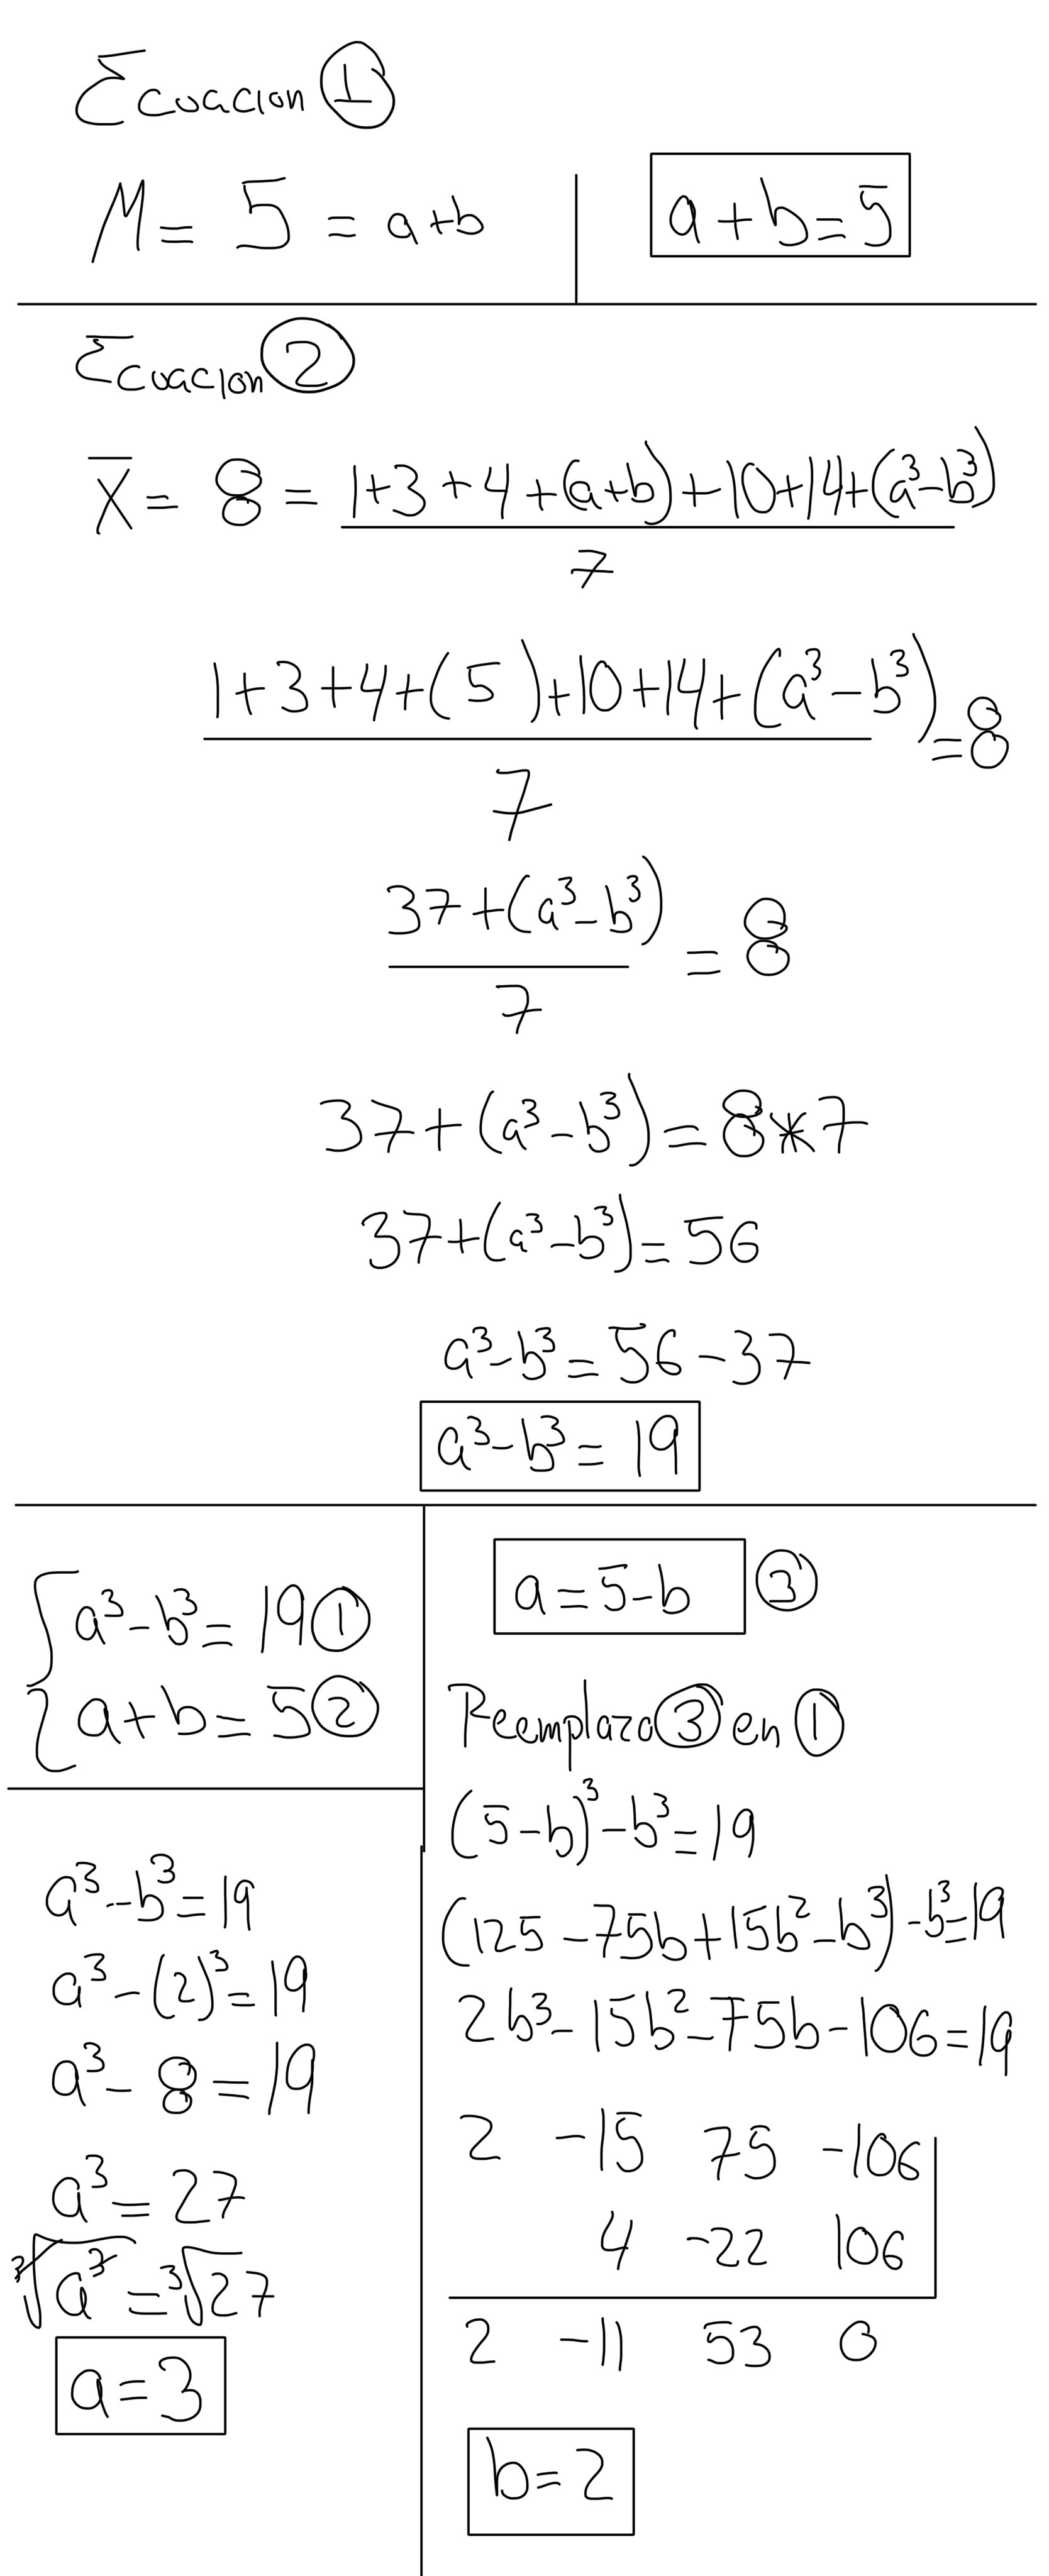
